### Abdul Rehman Khalid        L1F20BSCS0213
### Mohid Hameed         L1F20BSCS0372


In [28]:
# Basic

import warnings
warnings.filterwarnings('ignore')

import os
from os import makedirs # make directory
from os import listdir # list directories
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import zipfile
import urllib.request
from urllib.error import HTTPError
from keras.preprocessing.image import load_img, img_to_array
import csv
from tqdm import tqdm
import gdown

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread # Used to read images
from PIL import Image # Image Visulization

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import load_model, Model

In [2]:
# Define URLs for the zip files
# Dog-vs-Cat-Dataest  https://www.kaggle.com/competitions/dogs-vs-cats/data
dataset_url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3362/31148/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1721022089&Signature=zGtln6doJCgvSWyLTzkSdyepXOnxtneNOPjPmhwc30XafWoDoJOo3fdoR7GSONsfCi8%2FkaknF0Rt9ZBQ2HeV4Gv2RRZv5vHXaWXMCEIyfc7Hu%2FPKd9%2BWTCnmwPd%2Fb8ToQ%2B%2F8XrfL4D7ijBuRruZ330PPkeIOWU8Qy2S4yJto4nJi9Y5DtI7FKXv%2B6EqzBO%2FI6kBWCEr8AX0a6CT76cI97%2FLno2e2O5Rvj8HPkjx%2FoCjgYi91RFmtxknbl%2BJ19BvR5K493wM0N8%2FzDNJcx4GgXB9vYVo%2FfouFx0FskcMAI7TRzupKTS8wcWb6zycvLi2zfZ3uj%2FnjL%2Bxd44u%2B10mIfw%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip"

pred_dataset_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

# Create directories for downloading and extracting files
download_dir = '/content/download'
extracted_dir = '/content/download/extracted'
working_dir = '/content/kaggle/working/dataset_dogs_vs_cats'
pred_dir = '/content/kaggle/working/pred/'

os.makedirs(download_dir, exist_ok=True)
os.makedirs(extracted_dir, exist_ok=True)
os.makedirs(working_dir, exist_ok=True)
os.makedirs(pred_dir, exist_ok=True)

# Download the zip files
dataset_path = os.path.join(download_dir, "dataset.zip")
pred_dataset_path = os.path.join(download_dir, "pred_dataset.zip")

urllib.request.urlretrieve(dataset_url, dataset_path)
urllib.request.urlretrieve(pred_dataset_url, pred_dataset_path)

# Define the path for the Downloaded datasets zip file
dataset_zip_path = os.path.join(download_dir, "dataset.zip")
pred_dataset_zip_path = os.path.join(download_dir, "pred_dataset.zip")

# Extract zip files into the extracted directory
with zipfile.ZipFile(dataset_zip_path, 'r') as zipp:
    zipp.extractall(extracted_dir)

with zipfile.ZipFile(pred_dataset_zip_path, 'r') as zipp:
    zipp.extractall(pred_dir)

# Extract the train & test zip files
train_zip_path = os.path.join(extracted_dir, "train.zip")
test_zip_path = os.path.join(extracted_dir, "test1.zip")

# Extract zip files into the extracted directory
with zipfile.ZipFile(train_zip_path, 'r') as zipp:
    zipp.extractall(working_dir)

with zipfile.ZipFile(test_zip_path, 'r') as zipp:
    zipp.extractall(working_dir)

In [3]:
image_dir = "/content/kaggle/working/dataset_dogs_vs_cats/train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

data.shape

(25000, 2)

### Data Exploration

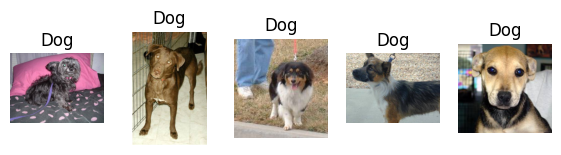

In [4]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):

    plt.subplot(10, 14,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/content/kaggle/working/dataset_dogs_vs_cats/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

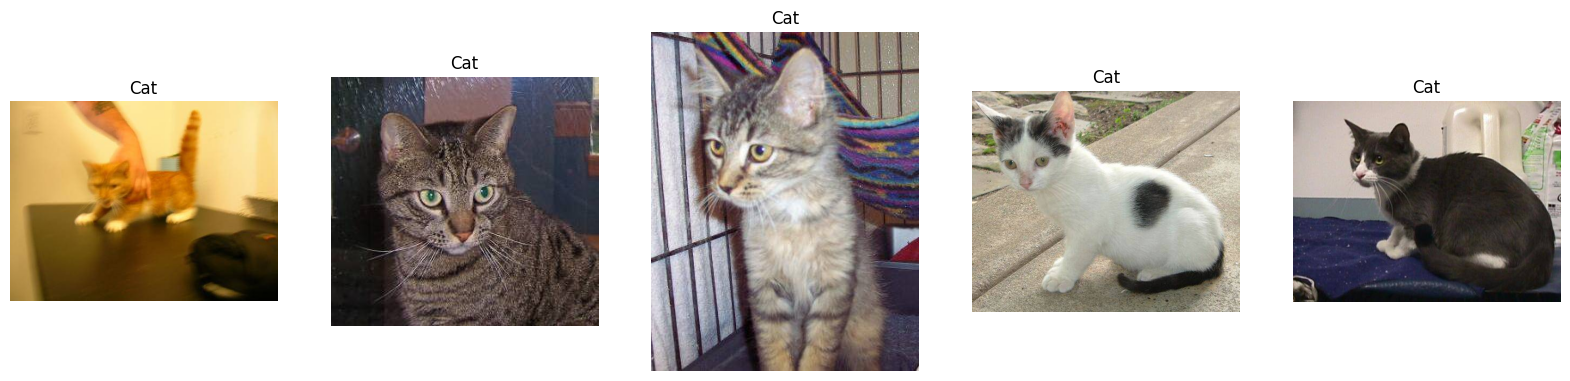

In [5]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):

    plt.subplot(1,5,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/content/kaggle/working/dataset_dogs_vs_cats/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

## Using Directory

In [6]:
!# create directories
dataset_home = '/kaggle/working/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True) # Create 4 directories
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2

In [7]:
# copy training dataset images into subdirectories
src_directory = '/content/kaggle/working/dataset_dogs_vs_cats/train'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)


path1 = "/kaggle/working/train/cats"
path3 = "/kaggle/working/test/cats"
path2 = "/kaggle/working/train/dogs"
path4 = "/kaggle/working/test/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 9973
Then number of dog images in training data is 9937
Then number of cat images in validation data is 2527
Then number of dog images in validation data is 2563


# Download Our Pretrained Model & CSV file
### (For Time Saving)

In [15]:
# Load CSV File
def load_features_from_csv(csv_file):
    try:
        df = pd.read_csv(csv_file, delimiter=',', quotechar='"', escapechar='\\')
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file: {e}")
        return None, None

    filenames = df['Filename'].values
    features = []

    for feature_str in df['Features'].values:
        feature = np.fromstring(feature_str, sep=',')
        features.append(feature)

    return np.array(features), filenames



In [41]:

# Download Our Features CSV File
features_csv_url = "1QBKi7WJZ8y0Qp8gwsdDlvlnPu7emkVF6"
features_csv_path = os.path.join(download_dir, "features.csv")
gdown.download(f'https://drive.google.com/uc?id={features_csv_url}', features_csv_path, quiet=False)

# Load Our Features CSV File
features, filenames = load_features_from_csv(features_csv_path)


# Download Our trained model
pretrained_model_url = "1Ok6yu8RYt0132_CkPl79CYxW7IG76_nI"
pretrained_model_path = os.path.join(download_dir, "model.h5")
gdown.download(f'https://drive.google.com/uc?id={pretrained_model_url}', pretrained_model_path, quiet=False)

# Load Our trained model
model = load_model(pretrained_model_path)

# Extract the feature extractor part of the model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

Downloading...
From (original): https://drive.google.com/uc?id=1QBKi7WJZ8y0Qp8gwsdDlvlnPu7emkVF6
From (redirected): https://drive.google.com/uc?id=1QBKi7WJZ8y0Qp8gwsdDlvlnPu7emkVF6&confirm=t&uuid=7ab2467c-7d29-4374-905b-a2adac20b56e
To: /content/download/features.csv
100%|██████████| 116M/116M [00:00<00:00, 128MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ok6yu8RYt0132_CkPl79CYxW7IG76_nI
From (redirected): https://drive.google.com/uc?id=1Ok6yu8RYt0132_CkPl79CYxW7IG76_nI&confirm=t&uuid=88af6bf1-bc27-4616-ac90-837af6b86a2b
To: /content/download/model.h5
100%|██████████| 354M/354M [00:08<00:00, 43.4MB/s]


# Model Training

### Train Test Split

In [13]:
# train test split using dataframe

labels = data['label']

# 20% split
# 80%.    20%
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

# 10%.   10%
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


We're doing train, test, validation split (80:10:10)

Now we will Create a barplot to see the class distrubtion in trainting dataset.

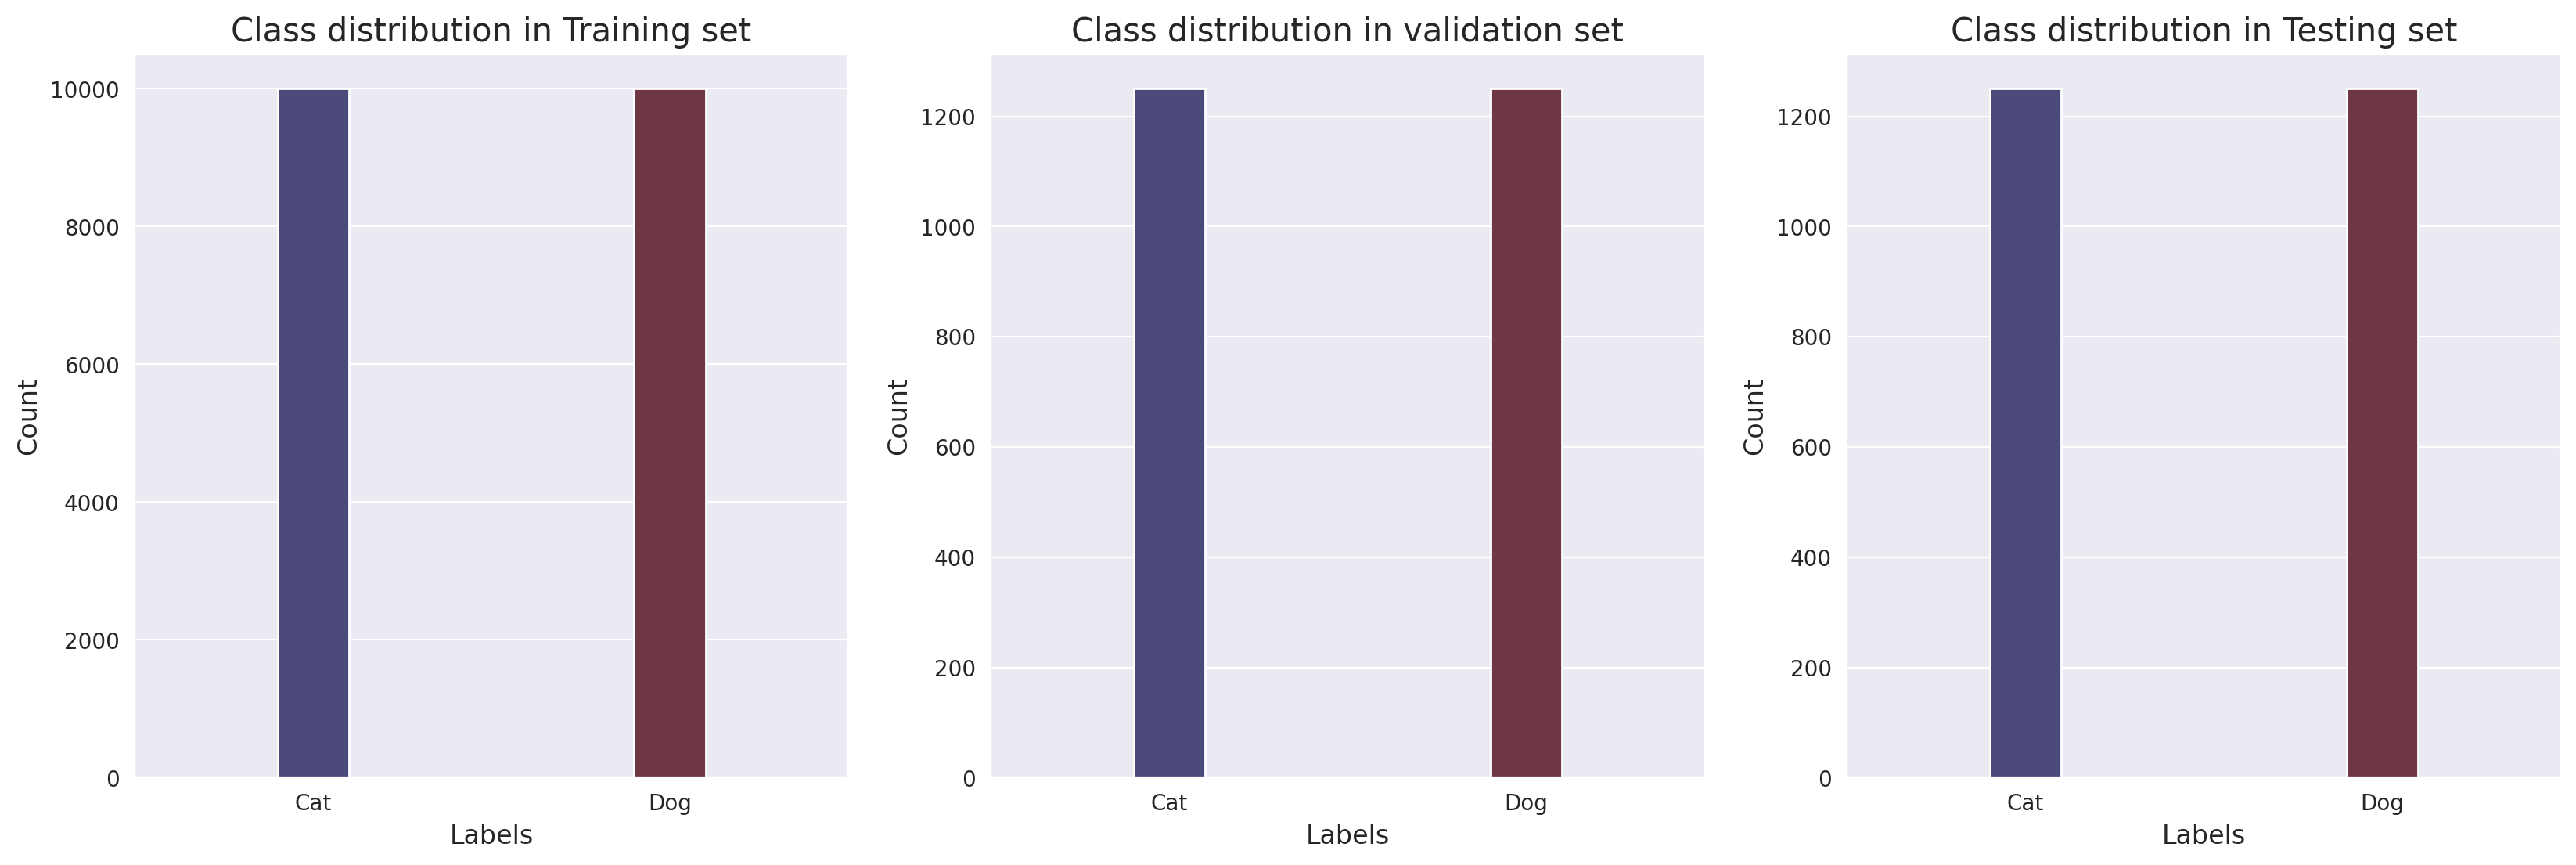

In [14]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

## Data Preparation

In [17]:
# parameters
image_size = 128 # Size of the image
image_channel = 3 # Colour scale (RGB)
bat_size = 32 # Number of files/images processed at once

### Image Data Generator

*  The data for will used by flow_from_dataframe and flow_from_directory.

*  The batch size is 32 and the image size is (128,128).




In [18]:
# Creating image data generator
# Preprocess images ==> Feature Engineering for Images
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
X_val.head()

filename label
851    dog.10677.jpg   dog
14433   dog.8836.jpg   dog
16053   cat.1854.jpg   cat
9723    cat.1353.jpg   cat
21892   dog.5546.jpg   dog

In [20]:
# Applying image data gernerator to train and test data

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = '/content/kaggle/working/dataset_dogs_vs_cats/train',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = '/content/kaggle/working/dataset_dogs_vs_cats/train',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = '/content/kaggle/working/dataset_dogs_vs_cats/train',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [21]:
train_gen = train_datagen.flow_from_directory('/kaggle/working/train/',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/kaggle/working/test',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


## Deep Learning Model

In [31]:
from keras.models import Model
# Build the model
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))  # Softmax for binary classification

# Create the feature extractor model using the last layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_24 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_25 (Ba  (None, 109, 109, 64)     

### Callbacks

In [32]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 2,restore_best_weights=True,verbose=0)

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fit the model

In [34]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[learning_rate_reduction],
                    epochs = 10,
                    steps_per_epoch = len(train_generator),
                    validation_steps = len(val_generator),
                   )

Epoch 1/10
625/625 [==============================] - 101s 148ms/step - loss: 0.6681 - accuracy: 0.6627 - val_loss: 0.6970 - val_accuracy: 0.6648 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 89s 142ms/step - loss: 0.5266 - accuracy: 0.7430 - val_loss: 0.5310 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 86s 138ms/step - loss: 0.4459 - accuracy: 0.7939 - val_loss: 0.5531 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.3532 - accuracy: 0.8481
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] - 87s 138ms/step - loss: 0.3532 - accuracy: 0.8481 - val_loss: 0.6763 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 85s 137ms/step - loss: 0.1875 - accuracy: 0.9290 - val_loss: 0.5357 - val_accuracy: 0.7896 - lr: 5.0000e-04
Epoch 6/10
625/625 [========================

In [35]:
cat_dog.history

{'loss': [0.668147087097168,
  0.5265933871269226,
  0.4459380507469177,
  0.3531661033630371,
  0.18746818602085114,
  0.10066842287778854,
  0.05754051357507706,
  0.04922373220324516,
  0.047990504652261734,
  0.02582094445824623],
 'accuracy': [0.6626999974250793,
  0.7429500222206116,
  0.7939000129699707,
  0.8481000065803528,
  0.9289500117301941,
  0.9661999940872192,
  0.982450008392334,
  0.9846000075340271,
  0.9836500287055969,
  0.9932500123977661],
 'val_loss': [0.696992039680481,
  0.5309592485427856,
  0.553112804889679,
  0.6762896776199341,
  0.5357231497764587,
  0.5587702393531799,
  0.6095526218414307,
  1.0667074918746948,
  0.7194481492042542,
  0.6681845784187317],
 'val_accuracy': [0.6647999882698059,
  0.7387999892234802,
  0.7368000149726868,
  0.7088000178337097,
  0.7896000146865845,
  0.7847999930381775,
  0.8087999820709229,
  0.7251999974250793,
  0.7820000052452087,
  0.8091999888420105],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0

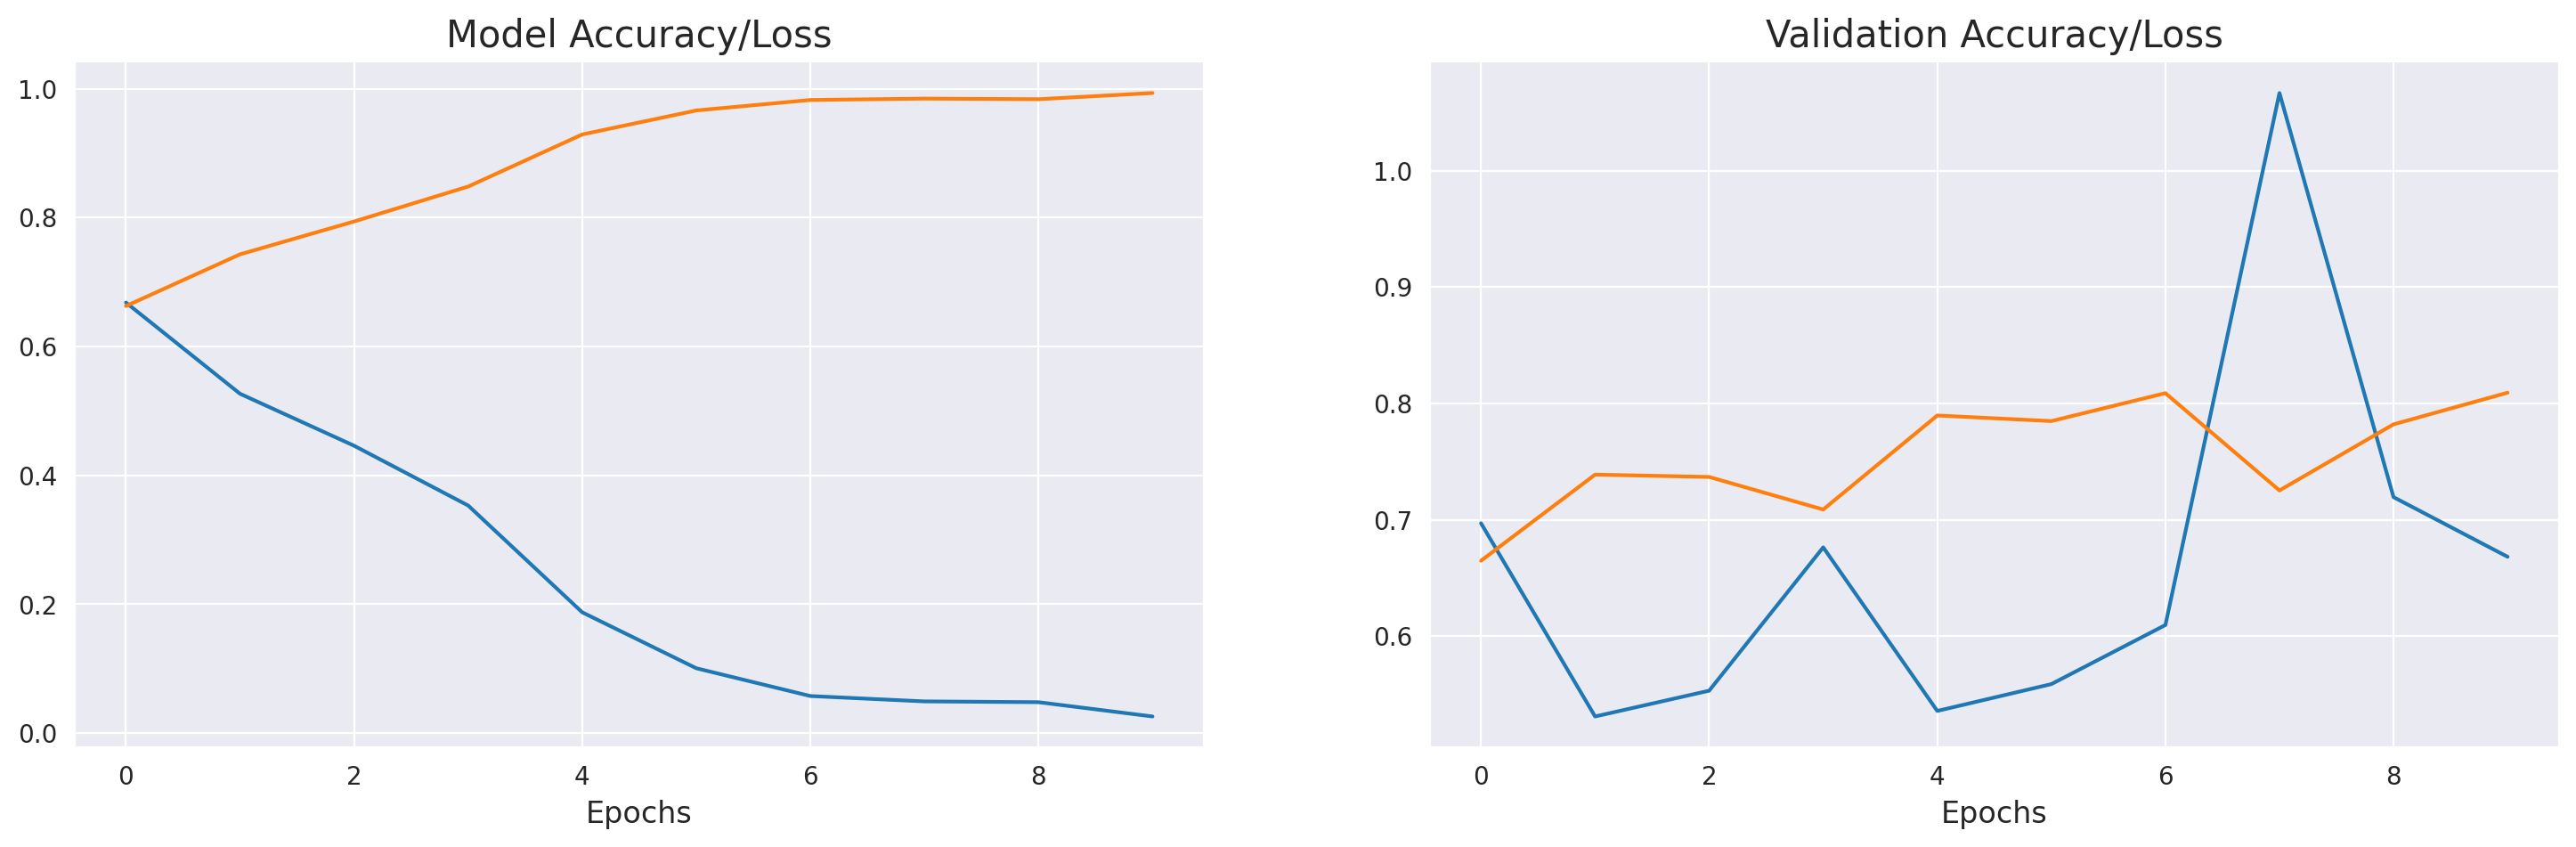

In [36]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Model Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['accuracy'])

plt.subplot(122)
plt.title('Validation Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['val_loss'])
plt.plot(error['val_accuracy'])

plt.show()

## Evaluvation

In [37]:
# Evaluate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.98999834060669
The Loss of the model for training data is: 0.002672869246453047
The accuracy of the model for validation data is: 80.91999888420105
The Loss of the model for validation data is: 0.6681845784187317


## Prediction

In [38]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 81.5999984741211
The Loss of the model for testing data is: 0.6264108419418335


In [39]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.82      0.82      0.82      1250
         Dog       0.82      0.82      0.82      1250

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



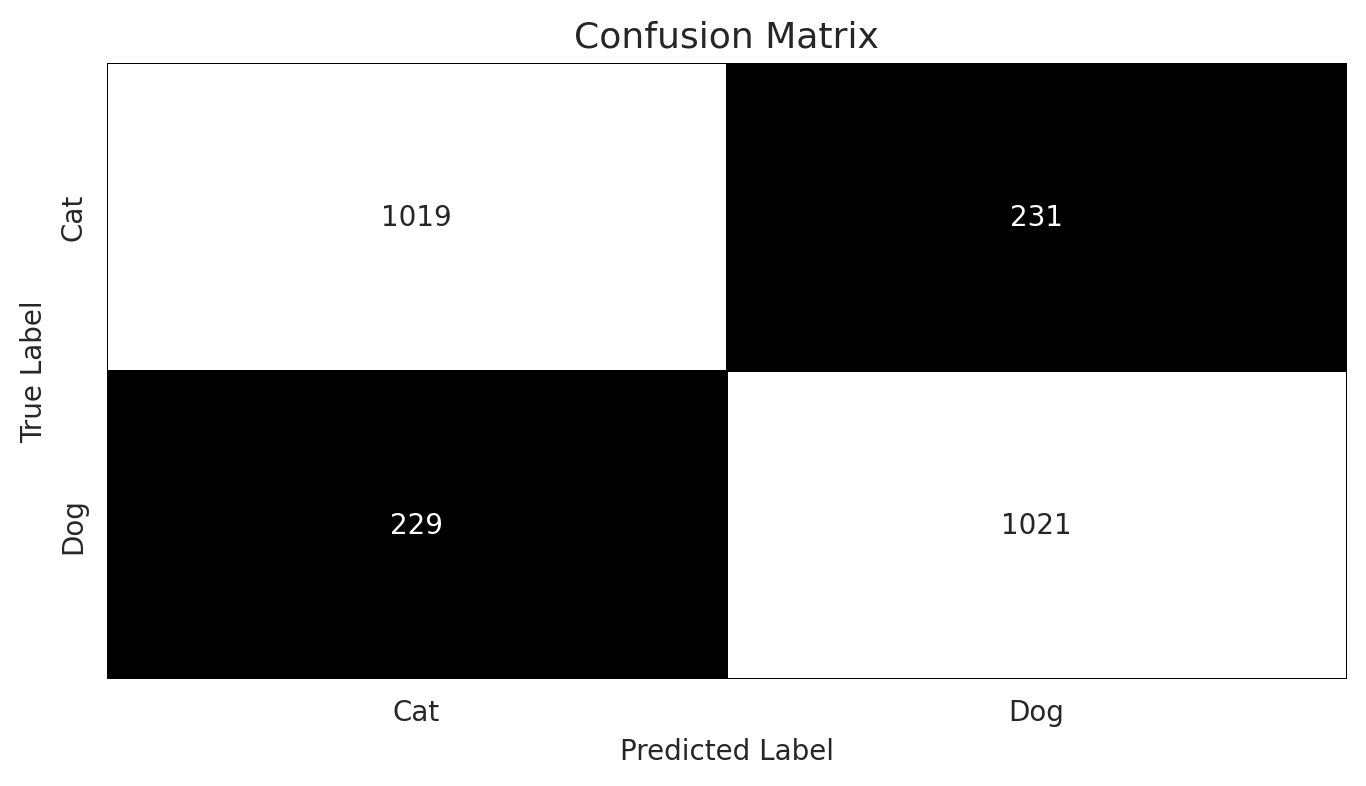

In [40]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()


## Extracting Features

In [ ]:


def extract_features(directory, feature_extractor, image_size):
    features = []
    filenames = []

    for root, _, files in os.walk(directory):
        for file in tqdm(files):
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(image_size, image_size))  # Use the updated image size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            filenames.append(file)  # Save only the filename

    return np.array(features), filenames

def save_to_csv(features, filenames, csv_file):
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Filename', 'Features'])
        for filename, feature in zip(filenames, features):
            writer.writerow([filename, ','.join(map(str, feature))])


train_images = '/kaggle/working/train'

features, filenames = extract_features(train_images, feature_extractor, image_size)

# Set your image directory and CSV file path
csv_file = '/content/Cat_Vs_Dogs_features.csv'

# Assuming `feature_extractor` and `image_size` are defined
save_to_csv(features, filenames, csv_file)

# Prediction With Microsoft Datasest

In [ ]:
cat = '/content/kaggle/working/pred/PetImages/Cat'
dog = '/content/kaggle/working/pred/PetImages/Dog'

imgs = []
preds = []

for index in [0, 1, 10, 100, 1000]:
    img_path_cat = cat + '/' + str(index) + '.jpg'
    img_path_dog = dog + '/' + str(index) + '.jpg'

    cat_output = pred_single(img_path_cat)
    dog_output = pred_single(img_path_dog)

    imgs.append(cat_output[0])
    preds.append(cat_output[1])

    imgs.append(dog_output[0])
    preds.append(dog_output[1])

plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):

    plt.subplot(1, 5,i+1)    # the number of images in the grid is 10*10 (100)
    plt.imshow(imgs[i])
    plt.title(f'{preds[i]}',fontsize=12)
    plt.axis('off')

plt.show()

In [41]:
import cv2

def pred_single(path):
    img = imread(path)

    resized_image = cv2.resize(img, (image_size, image_size))
    resized_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension
    rescaled_image = resized_image / 255.0  # Normalize pixel values to [0, 1]

    # Make predictions
    predictions = model.predict(rescaled_image)

    # Assuming you have binary classification, extract the class with the highest probability
    predicted_class = np.argmax(predictions)

    if predicted_class == 0:
        pred = 'cat'
    else:
        pred='dog'

    return [img, pred]

# check similarity of images

In [35]:
# Function to get similar images
def get_similar_images(query_img_path, feature_extractor, features, filenames, image_size, top_n=10):
    # Load and preprocess query image
    base_dir = '/content/kaggle/working/dataset_dogs_vs_cats/train'
    img = load_img(query_img_path, target_size=(image_size, image_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Extract features for query image
    query_feature = feature_extractor.predict(img_array).flatten().reshape(1, -1)

    # Calculate cosine similarity between query image and dataset images
    similarities = cosine_similarity(query_feature, features)
    similarities = similarities.flatten()

    # Get indices of top similar images
    indices = np.argsort(similarities)[::-1][:top_n]
    similar_images = [filenames[i] for i in indices]

    # Construct full paths for similar images
    similar_image_paths = [os.path.join(base_dir, filename) for filename in similar_images]

    return similar_image_paths

# Function to display similar images
def display_similar_images(query_img_path, similar_images):
    num_images_to_display = min(len(similar_images), 10)  # Limit to 10 images

    plt.figure(figsize=(5, 5))
    query_img = load_img(query_img_path)
    plt.imshow(query_img)
    plt.title('Query Image')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(similar_images[:num_images_to_display]):
        img = load_img(img_path)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 56ms/step


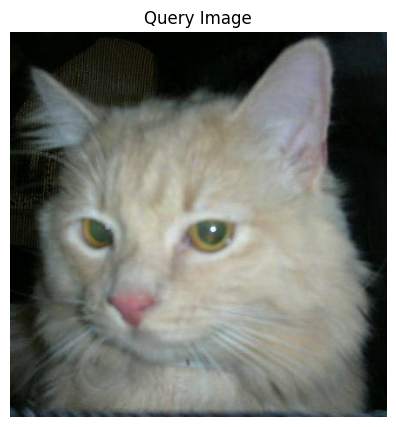

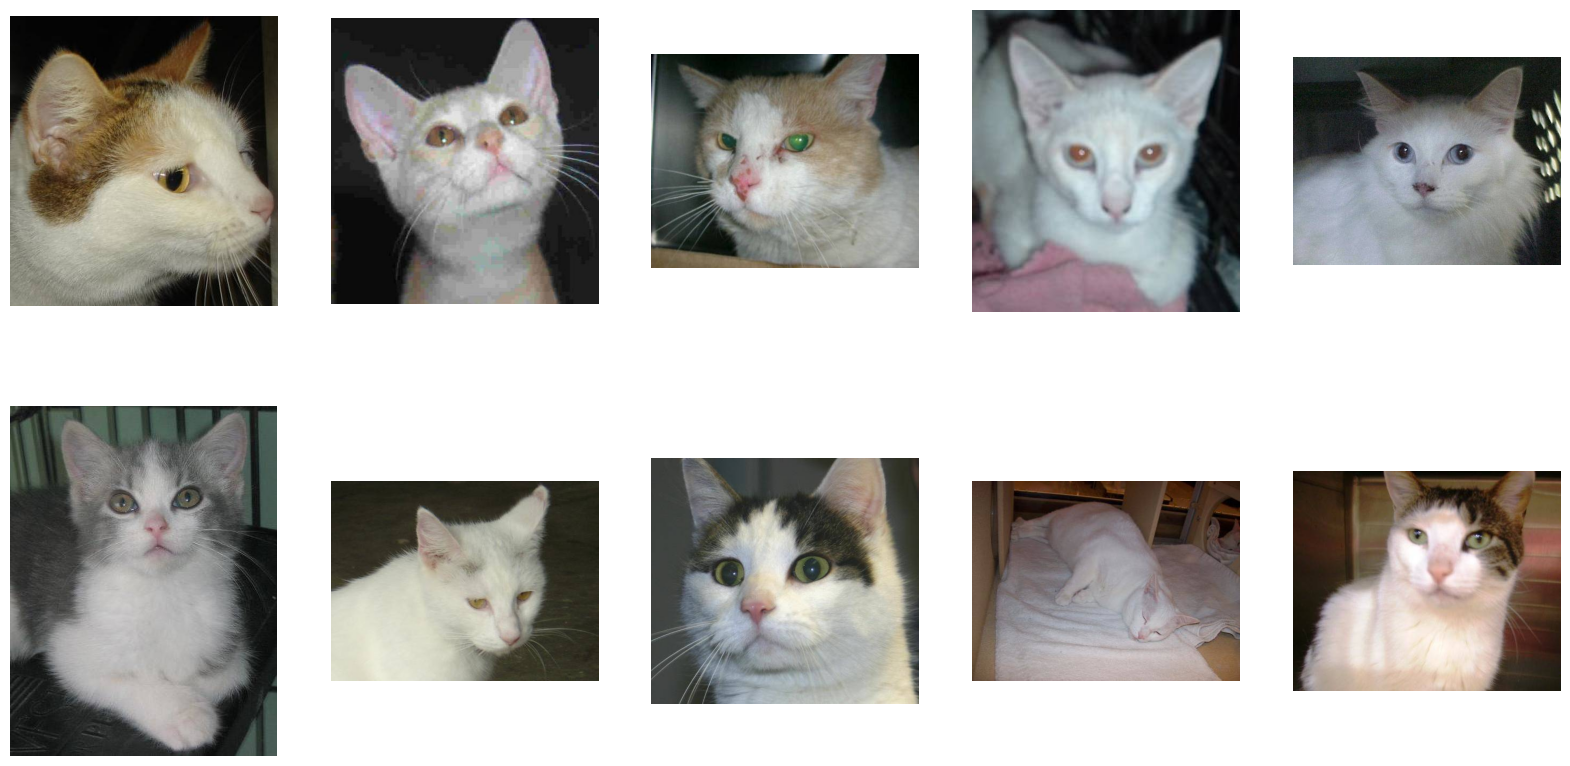

1/1 [==============================] - 0s 131ms/step


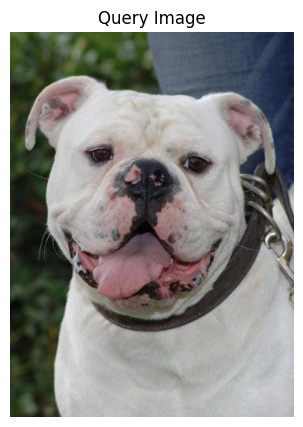

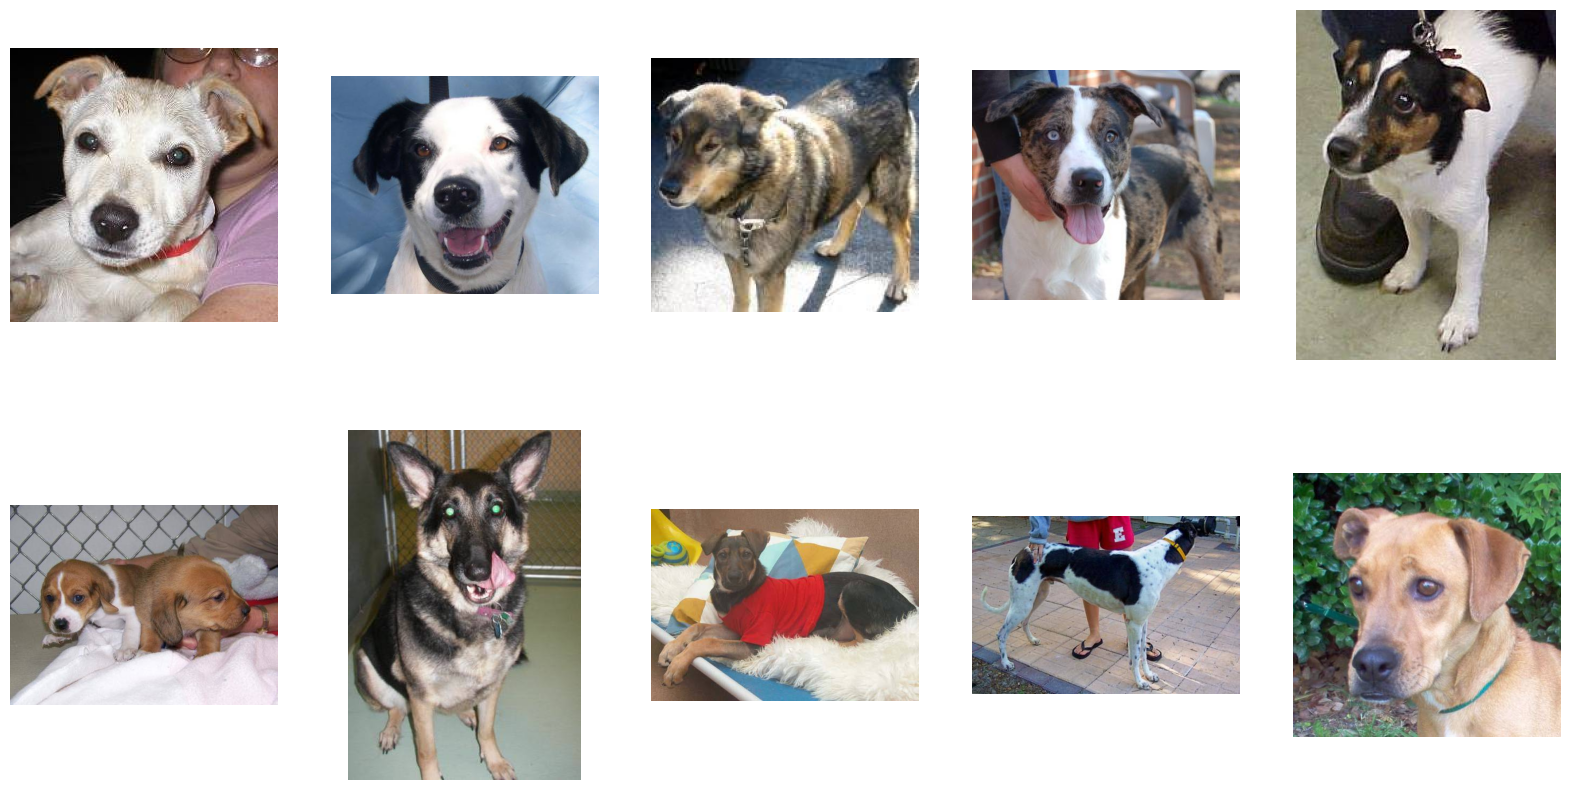

In [40]:
# Enter the images path to check simalr images:
query_img_paths = [
    '/content/kaggle/working/dataset_dogs_vs_cats/test1/116.jpg',
    '/content/kaggle/working/dataset_dogs_vs_cats/test1/182.jpg'
    # Add more paths if needed
]

image_size = 128

# Loop through each query image path and display similar images
for query_img_path in query_img_paths:
    similar_images = get_similar_images(query_img_path, feature_extractor, features, filenames, image_size)
    display_similar_images(query_img_path, similar_images)